# Seguro de automóveis da Suécia

## Definição do Problema

O dataset é composto por:
X = Número de reivindicações
Y = total pago por todas as reivindicações em mil coroas suecas.

link do dataset: https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset/data

Atributo de predição: y

### Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import model_selection 
from sklearn import neighbors
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Carregando e definindo as colunas do dataset

In [2]:
columns = ["X", "y"]
data = pd.read_csv('insurance.csv',names=columns, sep='\t')

### Visualização e descrição dos dados

In [3]:
data.head(10)

,X,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [4]:
data.describe()

,X,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [5]:
print(data.shape)

(63, 2)


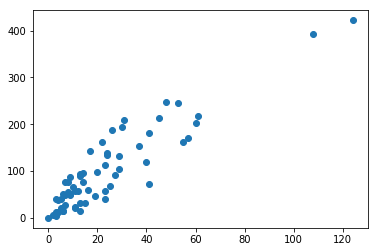

In [6]:
plt.scatter(data.values[:,0],data.values[:,1]);

In [7]:
data.corr()

,X,y
X,1.000000,0.912878
y,0.912878,1.000000


### Criação do dataset de validação 

In [8]:
dataset = data.values
print(dataset)

[[108.  392.5]
 [ 19.   46.2]
 [ 13.   15.7]
 [124.  422.2]
 [ 40.  119.4]
 [ 57.  170.9]
 [ 23.   56.9]
 [ 14.   77.5]
 [ 45.  214. ]
 [ 10.   65.3]
 [  5.   20.9]
 [ 48.  248.1]
 [ 11.   23.5]
 [ 23.   39.6]
 [  7.   48.8]
 [  2.    6.6]
 [ 24.  134.9]
 [  6.   50.9]
 [  3.    4.4]
 [ 23.  113. ]
 [  6.   14.8]
 [  9.   48.7]
 [  9.   52.1]
 [  3.   13.2]
 [ 29.  103.9]
 [  7.   77.5]
 [  4.   11.8]
 [ 20.   98.1]
 [  7.   27.9]
 [  4.   38.1]
 [  0.    0. ]
 [ 25.   69.2]
 [  6.   14.6]
 [  5.   40.3]
 [ 22.  161.5]
 [ 11.   57.2]
 [ 61.  217.6]
 [ 12.   58.1]
 [  4.   12.6]
 [ 16.   59.6]
 [ 13.   89.9]
 [ 60.  202.4]
 [ 41.  181.3]
 [ 37.  152.8]
 [ 55.  162.8]
 [ 41.   73.4]
 [ 11.   21.3]
 [ 27.   92.6]
 [  8.   76.1]
 [  3.   39.9]
 [ 17.  142.1]
 [ 13.   93. ]
 [ 13.   31.9]
 [ 15.   32.1]
 [  8.   55.6]
 [ 29.  133.3]
 [ 30.  194.5]
 [ 24.  137.9]
 [  9.   87.4]
 [ 31.  209.8]
 [ 14.   95.5]
 [ 53.  244.6]
 [ 26.  187.5]]


In [9]:
X = dataset[:,0:-1]
y = dataset[:,-1]
print (X.shape, y.shape)

(63, 1) (63,)


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,
                                                                    test_size=0.25, 
                                                                    shuffle = True, 
                                                                    random_state=42)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((63, 1), (63,), (47, 1), (47,), (16, 1), (16,))

### Criação dos modelos

#### Classificadores utilizados:

- Linear Regression
- Linear SVR
- SVR - Epsilon-Support Vector Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Extra Tree Regressor

In [11]:
resultados = {}
resultados['LR'] = { 'model': linear_model.LinearRegression() }
resultados['LSVR'] = { 'model': svm.LinearSVR() }
resultados['SVR'] = { 'model': svm.SVR(kernel='linear') }
resultados['RFR'] = { 'model': ensemble.RandomForestRegressor() }
resultados['GBR'] = {'model': ensemble.GradientBoostingRegressor()}
resultados['ETR'] = {'model': tree.ExtraTreeRegressor()}
resultados['KNN'] = {'model': neighbors.KNeighborsRegressor(n_neighbors=3)}

In [12]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['mse'] = metrics.mean_squared_error(y_test, resultados[key]['y_pred'])
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['mae'] = metrics.mean_absolute_error(y_test, resultados[key]['y_pred'])

processando LR...
processando LSVR...
processando SVR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...


In [13]:
df = pd.DataFrame(resultados)
df.T[['y_pred','mse','rmse','mae']]

,y_pred,mse,rmse,mae
ETR,"[248.1, 84.95, 422.2, 119.4, 202.4, 202.4, 84....",1432.2,37.8445,33.7865
GBR,"[166.43302769178234, 86.56460718092951, 420.40...",1684.44,41.0419,35.4867
KNN,"[204.4333333333333, 79.7, 262.4666666666667, 1...",2674.27,51.7134,44.075
LR,"[198.3316951845612, 98.5410860287601, 387.5897...",1232.85,35.1119,30.3545
LSVR,"[184.1311726954964, 85.51233919196731, 371.166...",1755.72,41.9013,37.6518
RFR,"[192.34999999999997, 86.8835, 374.279999999999...",1477.21,38.4345,33.3064
SVR,"[183.9240740740742, 86.55925925925925, 368.581...",1705.77,41.301,37.1975


In [14]:
df_T = df.transpose()
df_T = df_T[ ['rmse','mae'] ]
df_T

,rmse,mae
ETR,37.8445,33.7865
GBR,41.0419,35.4867
KNN,51.7134,44.075
LR,35.1119,30.3545
LSVR,41.9013,37.6518
RFR,38.4345,33.3064
SVR,41.301,37.1975


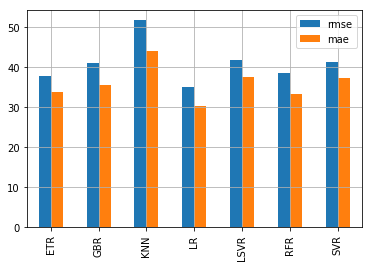

In [15]:
df_T.plot(kind='bar', grid=True);

In [17]:
modelo_final = linear_model.LinearRegression()
modelo_final.fit(X,y);